## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape,output=10,num_neurons_list=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, num_neurons in enumerate(num_neurons_list): 
        if i == 0:
            x = keras.layers.Dense(units=num_neurons,activation='relu',name = 'hidden_layers'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=num_neurons,activation='relu',name = 'hidden_layers'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output,activation='softmax',name = 'output_layers')(x)
    
    model = keras.models.Model(inputs = [input_layer],output=out)
    
    return model


model = build_mlp(x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layers2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layers3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output_layers (Dense)        (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\Xuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ou...)`
  from ipykernel import kernelapp as app


In [12]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95



In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('learing rate = %.6f' %(lr))
    
    opt = keras.optimizers.SGD(lr = lr, nesterov=True,momentum=MOMENTUM)
    model = build_mlp(x_train.shape[1:])
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
        
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


learing rate = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layers2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layers3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output_layers (Dense)        (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


C:\Users\Xuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ou...)`
  from ipykernel import kernelapp as app


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2394 - acc: 0.1580 - val_loss: 2.0846 - val_acc: 0.2159
Epoch 2/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9475 - acc: 0.2623 - val_loss: 2.0218 - val_acc: 0.2606
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8755 - acc: 0.3010 - val_loss: 1.8561 - val_acc: 0.3190
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8376 - acc: 0.3265 - val_loss: 1.8221 - val_acc: 0.3496
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7871 - acc: 0.3484 - val_loss: 1.9163 - val_acc: 0.3235
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7793 - acc: 0.3535 - val_loss: 1.8548 - val_acc: 0.3384
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7284 - acc: 0.3805 - val_loss: 1.7336 - val_ac

50000/50000 [==============================] - 4s 77us/step - loss: 1.6037 - acc: 0.4328 - val_loss: 1.6254 - val_acc: 0.4299
Epoch 3/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5069 - acc: 0.4676 - val_loss: 1.5897 - val_acc: 0.4335
Epoch 4/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4485 - acc: 0.4871 - val_loss: 1.4679 - val_acc: 0.4776
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4019 - acc: 0.5019 - val_loss: 1.5538 - val_acc: 0.4417
Epoch 6/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.3560 - acc: 0.5177 - val_loss: 1.4328 - val_acc: 0.4935
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.3178 - acc: 0.5334 - val_loss: 1.5302 - val_acc: 0.4671
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2894 - acc: 0.5434 - val_loss: 1.3985 - val_acc: 0.5038
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6679 - acc: 0.4143 - val_loss: 1.6496 - val_acc: 0.4176
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6214 - acc: 0.4293 - val_loss: 1.6084 - val_acc: 0.4336
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5811 - acc: 0.4454 - val_loss: 1.5760 - val_acc: 0.4433
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5468 - acc: 0.4572 - val_loss: 1.5471 - val_acc: 0.4538
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5179 - acc: 0.4687 - val_loss: 1.5399 - val_acc: 0.4575
Epoch 9/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4906 - acc: 0.4764 - val_loss: 1.5046 - val_acc: 0.4704
Epoch 10/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4653 - acc: 0.4856 - val_loss: 1.4953 - val_acc: 0.4694
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 70us/step - loss: 1.9411 - acc: 0.3234 - val_loss: 1.9252 - val_acc: 0.3262
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9089 - acc: 0.3350 - val_loss: 1.8970 - val_acc: 0.3332
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8826 - acc: 0.3419 - val_loss: 1.8738 - val_acc: 0.3392
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8616 - acc: 0.3494 - val_loss: 1.8558 - val_acc: 0.3485
Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8436 - acc: 0.3561 - val_loss: 1.8397 - val_acc: 0.3533
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8279 - acc: 0.3616 - val_loss: 1.8241 - val_acc: 0.3620
Epoch 11/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8137 - acc: 0.3669 - val_loss: 1.8093 - val_acc: 0.3643
Epoch 12/50
50000/50000 [=========================

Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1841 - acc: 0.2151 - val_loss: 2.1771 - val_acc: 0.2218
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.1678 - acc: 0.2251 - val_loss: 2.1617 - val_acc: 0.2303
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1527 - acc: 0.2341 - val_loss: 2.1472 - val_acc: 0.2354
Epoch 10/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1386 - acc: 0.2400 - val_loss: 2.1336 - val_acc: 0.2429
Epoch 11/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.1254 - acc: 0.2463 - val_loss: 2.1210 - val_acc: 0.2480
Epoch 12/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1133 - acc: 0.2499 - val_loss: 2.1095 - val_acc: 0.2520
Epoch 13/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1021 - acc: 0.2554 - val_loss: 2.0988 - val_acc: 0.2563
Epoch 14/50
50000/50000 [============

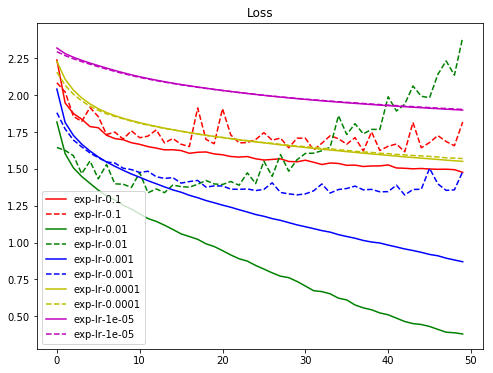

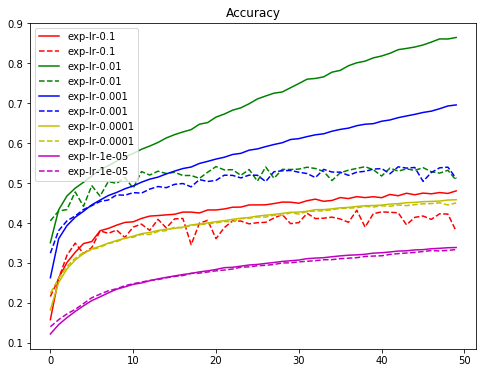

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()